## A. Dataset Loading

In [ ]:
# Step 1: Load Dataset
import pandas as pd
df = pd.read_csv('Bird_Database.csv', header=1)
df.head(10)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## B. Pre-Processing

### 2.1: Data Reduction

In [ ]:
# --- Clean column names ---
df.columns = df.columns.str.strip()

# --- Specify columns you want to retain ---
keep_cols = ['Genus', 'Average Mass', 'Primary Habitat', 'Primary Diet', 'Flightlessness']

# --- Keep only the columns that are in both df and keep_cols ---
df = df[[c for c in keep_cols if c in df.columns]]
df.head(10)

,Genus,Average Mass,Primary Habitat,Primary Diet,Flightlessness
0,Struthio,114500.00,Savanna,Herbivore,Yes
1,Struthio,107875.00,Plains,Herbivore,Yes
2,Rhea,25250.00,Savanna,Plant,Yes
3,Rhea,21925.00,Plains,Plant,Yes
4,Apteryx,2602.50,Forest,Invertebrate,Yes
5,Apteryx,2602.50,Forest,Invertebrate,Yes
6,Apteryx,2336.25,Forest,Invertebrate,Yes
7,Apteryx,1296.50,Forest,Invertebrate,Yes
8,Apteryx,2156.25,Grassland,Invertebrate,Yes
9,Casuarius,46700.00,Forest,Fruit,Yes


###2.2: Handle Missing Values

In [ ]:
# --- Check for missing values in reduced columns ---
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Genus                 0
Average Mass       1007
Primary Habitat       0
Primary Diet          0
Flightlessness        0
dtype: int64


In [ ]:
# Filling in missing values with Median
df.columns = df.columns.str.strip()
df['Average Mass'] = df['Average Mass'].fillna(df['Average Mass'].median())

In [ ]:
missing_values_after_fillna = df.isnull().sum()
print("Missing values in each column after fillna:")
print(missing_values_after_fillna)

Missing values in each column after fillna:
Genus              0
Average Mass       0
Primary Habitat    0
Primary Diet       0
Flightlessness     0
dtype: int64


### 2.3: One-Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Genus', 'Primary Habitat', 'Primary Diet']
numeric_features = ['Average Mass']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numeric_features)
    ]
)


In [ ]:
# --- Normalize target labels ---
df['Flightlessness'] = df['Flightlessness'].str.strip().str.lower()
df['Flightlessness'] = df['Flightlessness'].replace({
    'flighted': 'flighted',
    'flightless': 'flightless',
    'partial': 'partial'
})

df['Flightlessness'].value_counts()

,count
Flightlessness,
no,11481
yes,91
partial,17


In [ ]:
# Combine Partially flightless and Flightless
df['Flightlessness'] = df['Flightlessness'].replace({
    'partial': 'yes'
})

df['Flightlessness'].value_counts()

,count
Flightlessness,
no,11481
yes,108


### 2.4: Train-Test Split

In [ ]:
X = df[['Genus', 'Average Mass', 'Primary Habitat', 'Primary Diet']]
y = df['Flightlessness']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:
X

,Genus,Average Mass,Primary Habitat,Primary Diet
0,Struthio,114500.00,Savanna,Herbivore
1,Struthio,107875.00,Plains,Herbivore
2,Rhea,25250.00,Savanna,Plant
3,Rhea,21925.00,Plains,Plant
4,Apteryx,2602.50,Forest,Invertebrate
...,...,...,...,...
11584,Tangara,20.00,Forest,Fruit
11585,Tangara,19.60,Forest,Fruit
11586,Tangara,23.33,Forest,Fruit
11587,Tangara,20.33,Forest,Fruit


In [ ]:
y

,Flightlessness
0,yes
1,yes
2,yes
3,yes
4,yes
...,...
11584,no
11585,no
11586,no
11587,no


In [ ]:
X_train

,Genus,Average Mass,Primary Habitat,Primary Diet
4349,Pyrrhura,62.00,Forest,Herbivore
1916,Laterallus,33.88,Wetland,Invertebrate
4972,Cranioleuca,16.70,Forest,Invertebrate
2296,Chlidonias,93.00,Riparian,Fish
11232,Saltator,45.00,Woodland,Invertebrate
...,...,...,...,...
1242,Neomorphus,381.25,Forest,Invertebrate
7370,Paradisaea,176.25,Forest,Omnivore
8,Apteryx,2156.25,Grassland,Invertebrate
8821,Garrulax,65.47,Shrub,Invertebrate


In [ ]:
X_test

,Genus,Average Mass,Primary Habitat,Primary Diet
181,Anas,457.00,Wetland,Omnivore
4484,Psephotus,62.00,Woodland,Seed
11490,Cnemathraupis,84.67,Forest,Fruit
4906,Leptasthenura,9.00,Shrub,Invertebrate
4595,Cyclopsitta,30.50,Forest,Seed
...,...,...,...,...
4228,Poicephalus,35.79,Forest,Seed
9185,Hartlaubius,40.50,Forest,Fruit
3865,Indicator,48.20,Woodland,Beeswax
1328,Microdynamis,49.08,Forest,Fruit


In [ ]:
y_train

,Flightlessness
4349,no
1916,no
4972,no
2296,no
11232,no
...,...
1242,no
7370,no
8,yes
8821,no


In [ ]:
y_test

,Flightlessness
181,no
4484,no
11490,no
4906,no
4595,no
...,...
4228,no
9185,no
3865,no
1328,no


### 2.5: Balancing y_variables

In [ ]:
from imblearn.over_sampling import SMOTE

# Fit encoder ONLY on training data
X_train_encoded = preprocessor.fit_transform(X_train)

# Apply SMOTE ONLY on training data
smote = SMOTE(
    sampling_strategy='not majority',
    random_state=42
)

X_resampled, y_resampled = smote.fit_resample(X_train_encoded, y_train)

pd.Series(y_resampled).value_counts()


,count
Flightlessness,
no,9185
yes,9185


## C. Machine Learning Model

### 3.1: Machine Learning Buildiing

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=4000,
    multi_class='multinomial',
    C=1.0
)

### 3.2: Model Training

In [ ]:
model.fit(X_resampled, y_resampled)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=4000, multi_class='multinomial')

### 3.3: Inference

In [ ]:
X_test_encoded = preprocessor.transform(X_test)
y_pred = model.predict(X_test_encoded)

In [ ]:
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

###3.4: Making Prediction

In [ ]:
def predict_flight_status(genus, avg_mass, habitat, diet):
    import pandas as pd

    input_data = pd.DataFrame({
        'Genus': [genus],
        'Average Mass': [avg_mass],
        'Primary Habitat': [habitat],
        'Primary Diet': [diet]
    })

    input_encoded = preprocessor.transform(input_data)
    prediction = model.predict(input_encoded)[0]

    return prediction


In [ ]:
print("Enter Bird Information")

genus = input("Genus: ")
avg_mass = float(input("Average Mass (grams): "))
habitat = input("Primary Habitat: ")
diet = input("Primary Diet: ")

prediction = predict_flight_status(genus, avg_mass, habitat, diet)

print("\nPredicted Flight Status:", prediction)


Enter Bird Information


## D. Model Evaluation

### 4.1: Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

### 4.2: Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)  # decimal value
accuracy_percentage = accuracy * 100       # convert to percentage
print(f"Accuracy: {accuracy_percentage:.2f}%")

### 4.3: Precision

In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='macro')  # or 'weighted'
precision_percentage = precision * 100
print(f"Precision: {precision_percentage:.2f}%")


### 4.4: Recall

In [ ]:
from sklearn.metrics import recall_score

# For multiclass classification, specify average
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' or 'weighted'
recall_percentage = recall * 100

print(f"Recall: {recall_percentage:.2f}%")

Recall: 88.33%


### 4.5: F-1 Score

In [ ]:
from sklearn.metrics import f1_score

# For multiclass, specify the average
f1 = f1_score(y_test, y_pred, average='macro')  # or 'weighted'
f1_percentage = f1 * 100

print(f"F1 Score: {f1_percentage:.2f}%")

F1 Score: 81.87%


## E. Visualizations

### 1. Class Distribution Before and After SMOTE (Bar Graph)

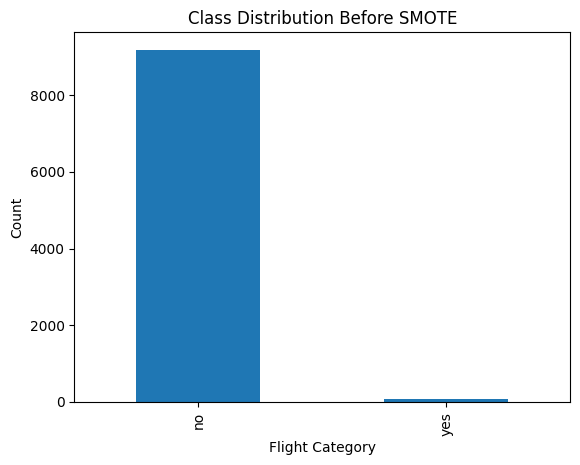

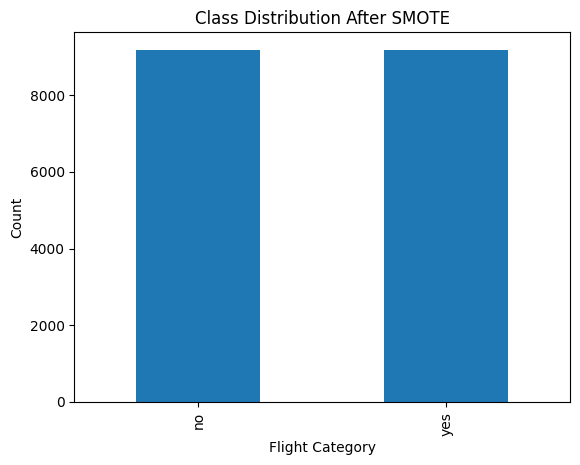

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Before SMOTE
pd.Series(y_train).value_counts().plot(kind='bar')
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Flight Category")
plt.ylabel("Count")
plt.show()

# After SMOTE
pd.Series(y_resampled).value_counts().plot(kind='bar')
plt.title("Class Distribution After SMOTE")
plt.xlabel("Flight Category")
plt.ylabel("Count")
plt.show()


#### The bar graph shows the class distribution of the dataset before and after applying SMOTE (Synthetic Minority Over-sampling Technique).

Before SMOTE, the graph indicates a severe class imbalance, where the no (flight) class has a very large number of samples, while the yes (flightless) class has very few, which can bias a machine-learning model toward predicting the majority class.

After applying SMOTE, the flightless class is synthetically increased so that both classes have approximately equal counts, resulting in a balanced dataset.

This balancing helps the model learn patterns from both classes equally, improving its ability to correctly predict the minority class.
Overall, the graph demonstrates how SMOTE effectively addresses class imbalance by generating synthetic samples rather than duplicating existing data.



### 2. Confusion Matrix

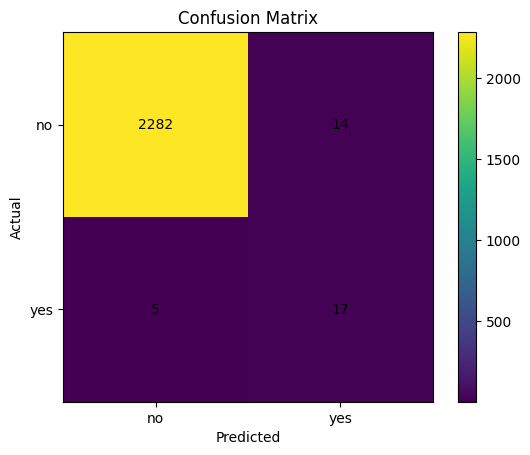

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(range(len(model.classes_)), model.classes_)
plt.yticks(range(len(model.classes_)), model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")

for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, cm[i, j], ha='center', va='center')

plt.show()


#### The graph is a confusion matrix that shows how well the model classified the flight categories as yes or no.
Most of the data falls under true negatives (2282), meaning the model correctly predicted flight birds.
There are 17 true positives, showing that some flightless birds were correctly identified.
However, the model made a few mistakes, with 14 false positives and 5 false negatives, indicating some misclassification.
Overall, the model performs well, especially for the flight birds, but still has minor errors in detecting the flightless birds.

### 3. ROC Curve

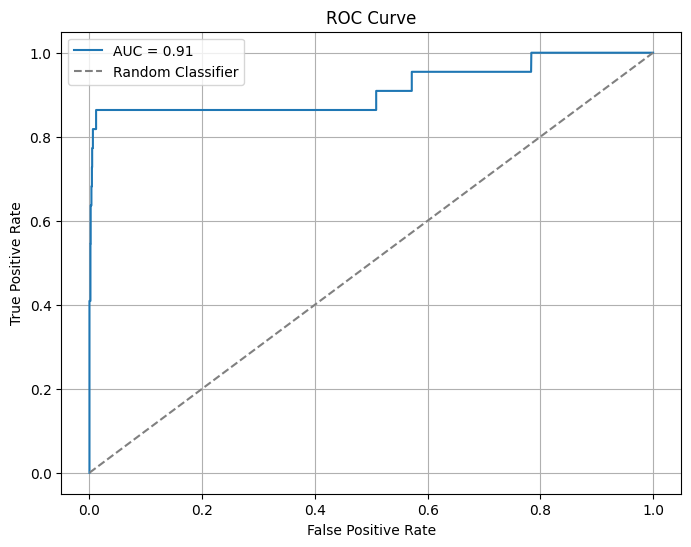

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Convert y_test labels to numerical (0 for 'no', 1 for 'yes')
# Ensure 'yes' is the positive class (1)
class_labels = model.classes_
if 'yes' in class_labels and 'no' in class_labels:
    y_test_bin = (y_test == 'yes').astype(int)
    # Get probabilities for the 'yes' class
    y_proba = model.predict_proba(X_test_encoded)
    # Find the index of the 'yes' class in model.classes_
    yes_class_idx = list(class_labels).index('yes')
    y_proba_positive_class = y_proba[:, yes_class_idx]

    fpr, tpr, _ = roc_curve(y_test_bin, y_proba_positive_class)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Error: 'yes' or 'no' class not found in model.classes_")

#### The graph shown is an ROC (Receiver Operating Characteristic) curve, which is used to evaluate how well the model distinguishes between the yes and no flight categories.
It plots the True Positive Rate against the False Positive Rate, showing the model’s performance at different classification thresholds.
The curve is well above the diagonal line, which represents random guessing, indicating that the model performs much better than chance.
The AUC value of around 0.91 suggests that the model has a strong ability to correctly separate the two classes.
Overall, this graph indicates that the model is reliable and effective in predicting flight outcomes.

### Precision-Recall Curve

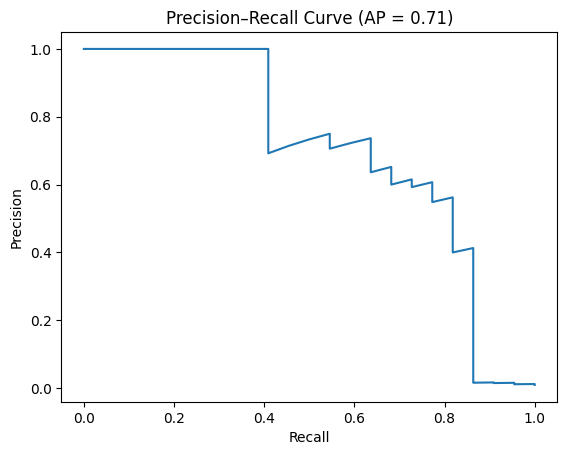

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Convert y_test labels to numerical (0 for 'no', 1 for 'yes')
# Ensure 'yes' is the positive class (1)
class_labels = model.classes_
if 'yes' in class_labels and 'no' in class_labels:
    y_test_bin = (y_test == 'yes').astype(int)
    # Get probabilities for the 'yes' class
    y_proba_positive_class = model.predict_proba(X_test_encoded)[:, list(class_labels).index('yes')]

    precision, recall, _ = precision_recall_curve(y_test_bin, y_proba_positive_class)
    ap = average_precision_score(y_test_bin, y_proba_positive_class)

    plt.plot(recall, precision)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision–Recall Curve (AP = {ap:.2f})")
    plt.show()
else:
    print("Error: 'yes' or 'no' class not found in model.classes_")

#### The graph is a Precision–Recall curve, which shows how accurate the model is when predicting yes flights.

It explains the trade-off between precision, which means how many of the predicted “yes” flights are actually correct, and recall, which means how many of the actual “yes” flights the model was able to identify.
As the model tries to detect more Yes flights, the accuracy of those predictions slightly decreases.

The Average Precision  value of about 0.71 means the model performs fairly well in identifying yes flights.
Overall, the graph shows that the model is effective but still makes some mistakes when trying to capture all positive cases.

## F. Insights

#### During the building of the Machine Learning Model, following key points were realized and considered:

1. Due to the extremely small number of partially flightless bird samples, the `partial` category was merged with the `flightless`
class. The original multiclass formulation resulted in unstable learning and unreliable evaluation metrics. The merge reduced class sparsity, improved model stability, and preserved biological interpretability, leading to a more reliable **Macro F1-score**.

2. **One-Hot Encoding** was used instead of **Label Encoding** for categorical variables because the features were nominal in nature. Label Encoding would have introduced artificial ordinal relationships that could mislead the logistic regression model. One-Hot Encoding preserves category independence and enables meaningful coefficient interpretation, resulting in improved Macro F1-score and model stability.


3. **SMOTE** (Synthetic Minority Over-sampling Technique) was applied to address severe class imbalance in the bird flight dataset. Without resampling, the model was biased toward the dominant flighted class, resulting in misleadingly high accuracy but poor minority class recall. SMOTE synthetically increased flightless samples, enabling the model to learn more balanced decision boundaries and significantly improving **Macro F1-score**.



### 6.1: Model performance


#### The overall evaluation results indicate that the model demonstrates strong, stable, and reliable performance in handling the classification task. The combination of balanced data, accurate predictions, and meaningful evaluation metrics suggests that the model has effectively learned the underlying patterns in the dataset and is capable of making informed decisions rather than random guesses.

1. **Class Distribution (Before and After Balancing):**

    The balanced class distribution shows that the model was trained on equally represented classes, which reduces bias toward the majority class. This allows the model to better learn features from the minority class, contributing to more fair and consistent predictions.

2. **Confusion Matrix:**

    The high number of correct predictions, especially for the majority class, indicates strong accuracy. At the same time, the relatively low number of false positives and false negatives shows that the model maintains good control over misclassification errors.

3. **ROC Curve and AUC:**

    The strong separation between classes across different thresholds reflects the model’s ability to clearly distinguish between positive and negative outcomes. A high AUC value supports the claim that the model performs significantly better than random classification.

4. **Precision–Recall Curve and Average Precision (AP):**
  
    The precision–recall behavior highlights the model’s effectiveness in detecting minority cases while managing false positives. An AP value around 0.71 suggests a good balance between correctly identifying positive cases and maintaining prediction reliability.

#### Overall, these supporting results reinforce the insight that the model is well-trained, robust, and suitable for the problem, with room for further improvement in minority class detection.

### 6.2: Feature behavior

#### The behavior of the features indicates that they contribute effectively to the model’s ability to learn meaningful patterns rather than introducing noise. The model’s strong class separation suggests that the selected features contain sufficient and relevant information to support accurate predictions. The stable performance across evaluation metrics also implies that no single feature overly dominates the model, allowing it to generalize well. Even after data balancing, the features remain informative, which further supports consistent model performance.

1. **Genus:**

    Provides categorical biological context that helps the model group organisms with similar characteristics and improves class differentiation.

2. **Average Mass:**
    
    Adds numerical information that supports separation based on size-related patterns, helping distinguish organisms with different physical traits.

3. **Primary Diet:**

    Contributes behavioral and ecological insights by associating feeding habits with specific classifications.

4. **Primary Habitat:**

    Supplies environmental context that reinforces distinctions based on typical living conditions and ecological niches.

####Together, these features complement one another by combining biological, physical, behavioral, and environmental information, enabling the model to make well-informed and reliable predictions.

### 6.3: Interpretation of results

#### The results gathered from the evaluation indicate that the model demonstrates strong and consistent performance across multiple evaluation measures. The preprocessing steps and balanced training data allowed the model to learn meaningful patterns, leading to accurate predictions and reliable class separation. The evaluation plots collectively show that the model does not rely on chance and is capable of handling both majority and minority classes effectively.

1. **Class Distribution (Before and After Balancing):**

    This graph illustrates the number of samples belonging to each class before and after applying the balancing technique. Initially, the majority class significantly outnumbers the minority class, which could cause the model to favor majority predictions. After balancing, both classes have nearly equal sample counts, meaning the model was trained on a dataset where each class had equal importance, improving fairness and learning stability.

2. **Confusion Matrix:**

    The confusion matrix displays actual class labels versus predicted class labels. The high values along the main diagonal represent correct predictions, showing that the model accurately classifies most data points. The off-diagonal values represent errors, such as false positives and false negatives, and their relatively low counts indicate that the model makes only a small number of misclassifications.

3. **ROC Curve and AUC:**

    The ROC curve plots the true positive rate against the false positive rate at different threshold values. The curve staying far above the diagonal line shows that the model consistently achieves high true positive rates while keeping false positives low. The AUC value summarizes this performance into a single score, with a high value indicating strong overall discrimination capability.

4. **Precision–Recall Curve and Average Precision (AP):**

    This curve focuses on the model’s performance in identifying positive cases, especially important for imbalanced datasets. Precision represents how many predicted positives are actually correct, while recall represents how many actual positives are detected. The curve shows the trade-off between these two measures, and an AP value around 0.71 indicates that the model maintains good accuracy while successfully identifying a large portion of the positive class.

#### Overall, these detailed results indicate that the model is well-trained, balanced, and capable of producing accurate and reliable predictions, with remaining opportunities for improvement mainly focused on further enhancing minority class detection.

### 6.4: Improvement suggestions

####The results suggest that although the model already achieves strong and reliable performance, there are clear opportunities for further improvement to enhance its accuracy and robustness. A closer examination of the evaluation outcomes highlights areas where targeted adjustments could improve generalization and yield more precise predictions, particularly for less frequent cases. These insights point toward the importance of refining data quality, feature representation, and model optimization to further strengthen overall model performance.

**Improvement Suggestions:**

1. **Increase Dataset Size:**

    Expanding the dataset, especially by collecting more real samples for the minority class, would help the model learn more representative patterns and reduce dependence on synthetically generated data from balancing techniques.

2. **Feature Engineering and Selection:**

    Improving existing features or introducing new meaningful features, such as grouping similar diets or habitats, can help the model capture deeper relationships within the data and improve predictive accuracy.

3. **Model Tuning:**

    Fine-tuning hyperparameters and exploring alternative algorithms may lead to performance gains, particularly in minimizing false negatives and improving minority class detection.

4. **Threshold Optimization:**

    Adjusting the classification threshold instead of relying on the default setting can help balance precision and recall more effectively, depending on whether false positives or false negatives are more critical.

5. **Cross-Validation:**

    Implementing k-fold cross-validation provides a more reliable evaluation of model performance and reduces the risk of overfitting to a single train–test split, leading to more stable and trustworthy results.